In [135]:
#  used salesdata  as dataset to do today lesson 

import pandas as pd
import numpy as np

#df=pd.read_csv('pokemon.csv')
df=pd.read_csv ('salesdata.csv')              
               
df.head(2)


,Country,Year,Month,MonthStart,Region,DealerID,DealerName,DealerRating,MembershipTier,Channel,ProductCategory,UnitsSold,UnitPrice,GrossSales,DiscountRate,DiscountAmount,NetSales
0,United Kingdom,2022,1,2022-01-01,London,D1001,London Dealer 1,3,Standard,Retail,Home & Garden,50,69.65,3482.5,0.0101,35.08,3447.42
1,United Kingdom,2022,1,2022-01-01,London,D1001,London Dealer 1,3,Standard,Retail,Clothing,90,32.04,2883.6,0.0199,57.46,2826.14


In [136]:
# filter by re
region_sales = df.groupby("Region", as_index=False)["GrossSales"].sum()

print (region_sales)


                      Region  GrossSales
0              East Midlands  3004081.43
1            East of England  3175703.84
2                     London  3184681.32
3                 North East  3065606.06
4                 North West  3151262.37
5           Northern Ireland  3119742.54
6                   Scotland  3070613.33
7                 South East  3009742.46
8                 South West  3076232.00
9                      Wales  3132295.71
10             West Midlands  3179046.19
11  Yorkshire and the Humber  3099874.25


In [137]:
 #filter by only certain regions starts with 's'

s_region_sales = region_sales[region_sales["Region"].str.startswith("S")]
print(s_region_sales)



       Region  GrossSales
6    Scotland  3070613.33
7  South East  3009742.46
8  South West  3076232.00


In [138]:
sample_data = {
    "Region": ["London", "North", "South", "East", None],
    "NetSales": [3447.42, 2800.10, None, 1950.50, 2200.00],
    "GrossSales": [3482.50, None, 3000.00, 2000.00, 2250.00]
}

df_missing = pd.DataFrame(sample_data)
print(df_missing)

avg1 = df_missing["NetSales"].mean()   # average = mean
print("Average (mean):", avg1)

mean1 = df_missing["NetSales"].mean()  # same as avg
print("Mean:", mean1)

median1 = df_missing["NetSales"].median()
print("Median:", median1)





   Region  NetSales  GrossSales
0  London   3447.42      3482.5
1   North   2800.10         NaN
2   South       NaN      3000.0
3    East   1950.50      2000.0
4    None   2200.00      2250.0
Average (mean): 2599.505
Mean: 2599.505
Median: 2500.05


In [139]:
region_sales = (
    df.groupby("Region", as_index=False)["NetSales"]
      .sum()
      .rename(columns={"NetSales": "TotalSales"})
)

# Calculate 30% of each region's total
region_sales["ThirtyPercent"] = region_sales["TotalSales"] * 0.30

print(region_sales)


                      Region  TotalSales  ThirtyPercent
0              East Midlands  2857300.54     857190.162
1            East of England  3035299.14     910589.742
2                     London  3075730.67     922719.201
3                 North East  2852436.52     855730.956
4                 North West  2992000.87     897600.261
5           Northern Ireland  2953303.25     885990.975
6                   Scotland  2877445.43     863233.629
7                 South East  2922763.97     876829.191
8                 South West  2936249.45     880874.835
9                      Wales  2935739.35     880721.805
10             West Midlands  2978746.84     893624.052
11  Yorkshire and the Humber  2945485.16     883645.548


In [140]:
best_region = region_sales.iloc[0]
print("\nBest Region:", best_region["Region"], "with sales:", best_region["TotalSales"])

best_region = region_sales.loc[region_sales["TotalSales"].idxmax()]
worst_region = region_sales.loc[region_sales["TotalSales"].idxmin()]

print("Best Region:", best_region["Region"], "with sales:", best_region["TotalSales"])
print("Worst Region:", worst_region["Region"], "with sales:", worst_region["TotalSales"])


Best Region: East Midlands with sales: 2857300.54
Best Region: London with sales: 3075730.67
Worst Region: North East with sales: 2852436.52


In [141]:
#finding best dealer in each region - Group by Region and Dealer, then sum sales
dealer_sales = (
    df.groupby(["Region", "DealerName"], as_index=False)["NetSales"]
      .sum()
      .rename(columns={"NetSales": "TotalSales"})
)

# Find best dealer in each region
best_dealers = dealer_sales.loc[
    dealer_sales.groupby("Region")["TotalSales"].idxmax()
]

print(best_dealers)


                      Region          DealerName  TotalSales
2              East Midlands       East Dealer 3   612377.87
5            East of England       East Dealer 1   661227.30
13                    London     London Dealer 4   635650.88
17                North East      North Dealer 3   622701.20
24                North West      North Dealer 5   665587.15
26          Northern Ireland   Northern Dealer 2   629798.23
32                  Scotland   Scotland Dealer 3   594430.09
39                South East      South Dealer 5   638021.24
44                South West      South Dealer 5   609691.23
45                     Wales      Wales Dealer 1   633328.39
51             West Midlands       West Dealer 2   653685.68
56  Yorkshire and the Humber  Yorkshire Dealer 2   611750.49


                                  DealerName  BestSales         WorstDealer  \
Region                                                                        
East Midlands                  East Dealer 3  612377.87       East Dealer 2   
East of England                East Dealer 1  661227.30       East Dealer 3   
London                       London Dealer 4  635650.88     London Dealer 2   
North East                    North Dealer 3  622701.20      North Dealer 1   
North West                    North Dealer 5  665587.15      North Dealer 1   
Northern Ireland           Northern Dealer 2  629798.23   Northern Dealer 5   
Scotland                   Scotland Dealer 3  594430.09   Scotland Dealer 1   
South East                    South Dealer 5  638021.24      South Dealer 4   
South West                    South Dealer 5  609691.23      South Dealer 2   
Wales                         Wales Dealer 1  633328.39      Wales Dealer 3   
West Midlands                  West Dealer 2  653685

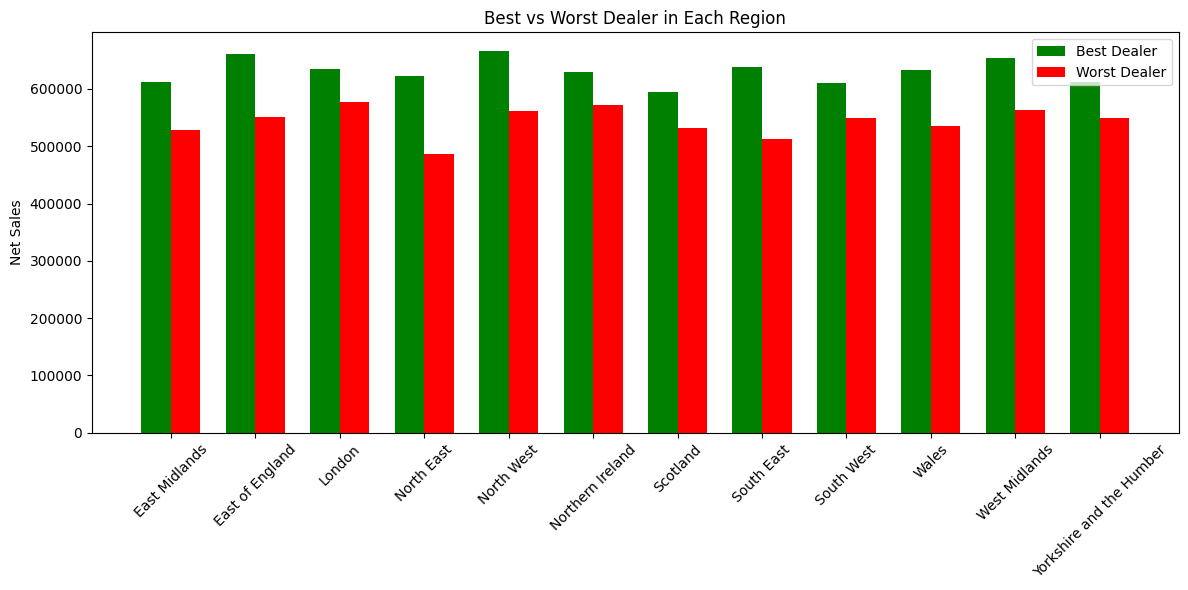

In [142]:
import matplotlib.pyplot as plt

# --- Group sales by Region & Dealer ---
dealer_sales = (
    df.groupby(["Region", "DealerName"], as_index=False)["NetSales"]
      .sum()
      .rename(columns={"NetSales": "TotalSales"})
)

# Best dealer per region
best_dealers = dealer_sales.loc[
    dealer_sales.groupby("Region")["TotalSales"].idxmax()
].set_index("Region")

# Worst dealer per region
worst_dealers = dealer_sales.loc[
    dealer_sales.groupby("Region")["TotalSales"].idxmin()
].set_index("Region")

# Combine into one DataFrame
compare = best_dealers[["DealerName","TotalSales"]].rename(
    columns={"Dealer":"BestDealer","TotalSales":"BestSales"}
).join(
    worst_dealers[["DealerName","TotalSales"]].rename(
        columns={"DealerName":"WorstDealer","TotalSales":"WorstSales"}
    )
)

print(compare)  # see table

# --- Plot grouped bar chart with labels ---
plt.figure(figsize=(12,6))
bar_width = 0.35
regions = compare.index
x = range(len(regions))

bars1 = plt.bar(x, compare["BestSales"], width=bar_width, label="Best Dealer", color="green")
bars2 = plt.bar([i+bar_width for i in x], compare["WorstSales"], width=bar_width, label="Worst Dealer", color="red")

plt.xticks([i+bar_width/2 for i in x], regions, rotation=45)
plt.ylabel("Net Sales")
plt.title("Best vs Worst Dealer in Each Region")
plt.legend()

# Add labels on bars (Dealer name + sales value)

plt.tight_layout()
plt.show()


In [143]:
df2=pd.read_csv('pokemon.csv')
df2.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


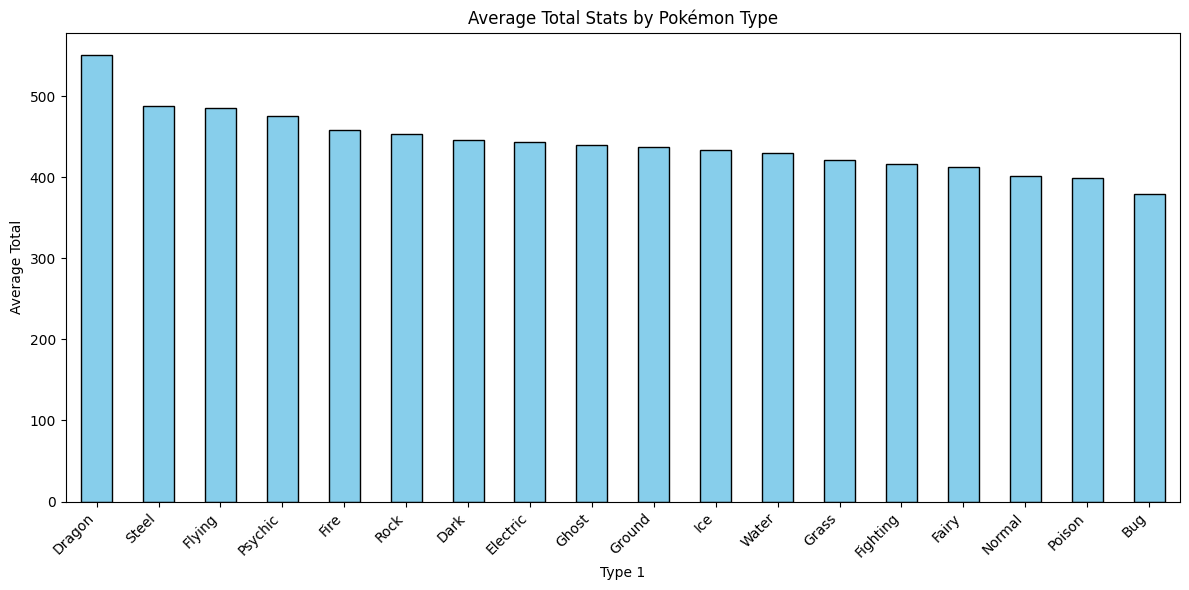

In [144]:
import matplotlib.pyplot as plt

avg_total = df2.groupby("Type 1")["Total"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
avg_total.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Total Stats by Pokémon Type")
plt.ylabel("Average Total")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
 

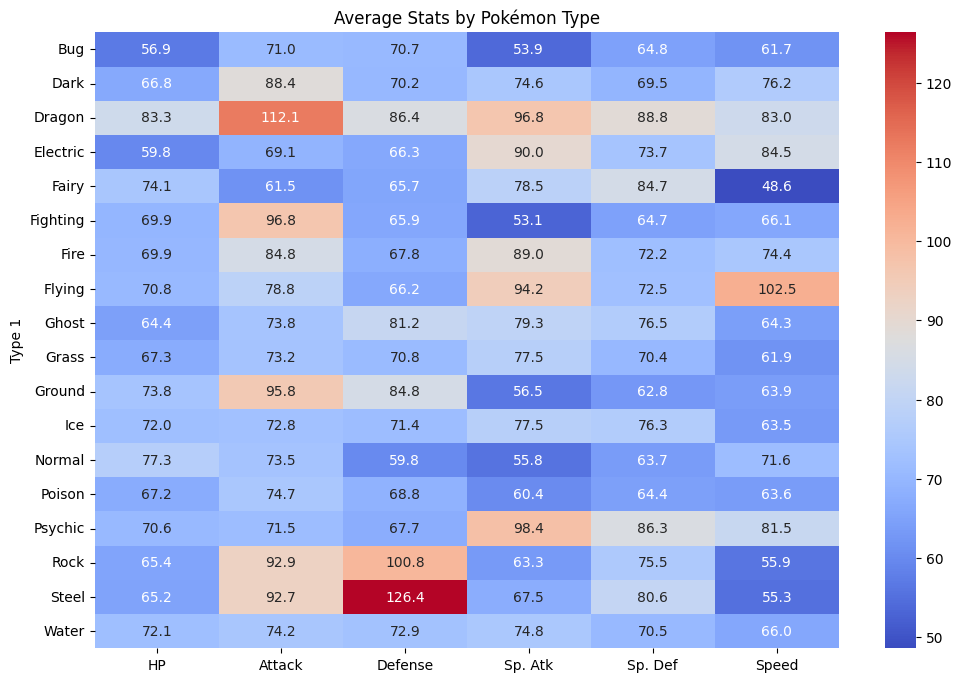

In [145]:
import seaborn as sns

avg_stats = df2.groupby("Type 1")[["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]].mean()

plt.figure(figsize=(12,8))
sns.heatmap(avg_stats, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Average Stats by Pokémon Type")
plt.show()


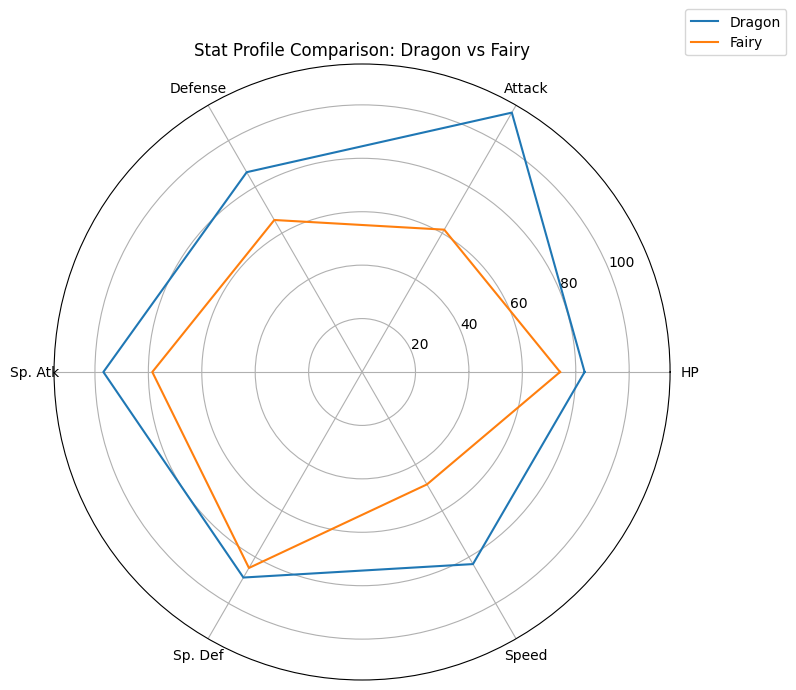

In [146]:
types = ["Dragon", "Fairy"]
stats = ["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]

angles = np.linspace(0, 2*np.pi, len(stats), endpoint=False).tolist()
angles += angles[:1]  # loop back

plt.figure(figsize=(8,8))

for t in types:
    values = df2[df2["Type 1"]==t][stats].mean().tolist()
    values += values[:1]  # close loop
    plt.polar(angles, values, label=t)

plt.xticks(angles[:-1], stats)
plt.title("Stat Profile Comparison: Dragon vs Fairy")
plt.legend(loc="upper right", bbox_to_anchor=(1.2,1.1))
plt.show()